In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL

df = pd.read_csv("C:/Users/hp/Downloads/Practical_Data/stock.txt", parse_dates=['Date'], index_col=['Date'])
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2012-05-18,42.05,45.00,38.00,38.23,580438450,0
2012-05-21,36.53,36.66,33.00,34.03,169418988,0
2012-05-22,32.61,33.59,30.94,31.00,101876406,0
2012-05-23,31.37,32.50,31.36,32.00,73678512,0
2012-05-24,32.95,33.21,31.77,33.03,42560731,0


In [3]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1381.000000,1381.000000,1381.000000,1381.000000,1.381000e+03,1381.0
mean,83.543667,84.384940,82.630555,83.543827,3.770716e+07,0.0
std,43.981535,44.161698,43.756570,44.015093,3.294912e+07,0.0
min,18.080000,18.270000,17.550000,17.730000,5.913000e+06,0.0
25%,46.750000,47.530000,45.960000,46.700000,1.843043e+07,0.0
50%,78.600000,79.690000,77.930000,78.790000,2.812660e+07,0.0
75%,117.710000,118.600000,116.700000,117.650000,4.601640e+07,0.0
max,182.360000,182.900000,180.570000,182.660000,5.804384e+08,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1381 entries, 2012-05-18 to 2017-11-10
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     1381 non-null   float64
 1   High     1381 non-null   float64
 2   Low      1381 non-null   float64
 3   Close    1381 non-null   float64
 4   Volume   1381 non-null   int64  
 5   OpenInt  1381 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 75.5 KB


In [5]:
df.isna().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [6]:
df.isnull().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

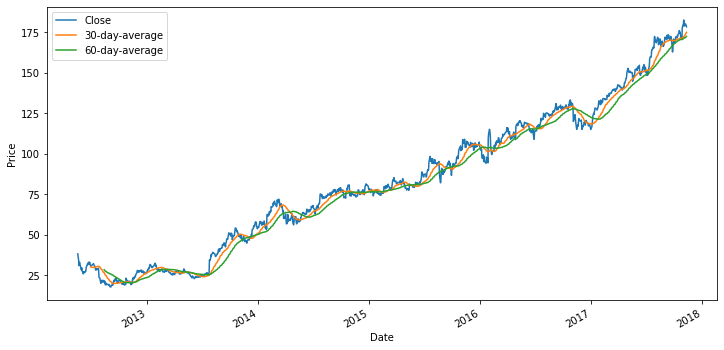

In [7]:
df["30-day-average"] = df['Close'].rolling(window=30).mean()
df["60-day-average"] = df['Close'].rolling(window=60).mean()
df[["Close", "30-day-average", "60-day-average"]].plot(figsize=(12,6), label="Moving averages")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

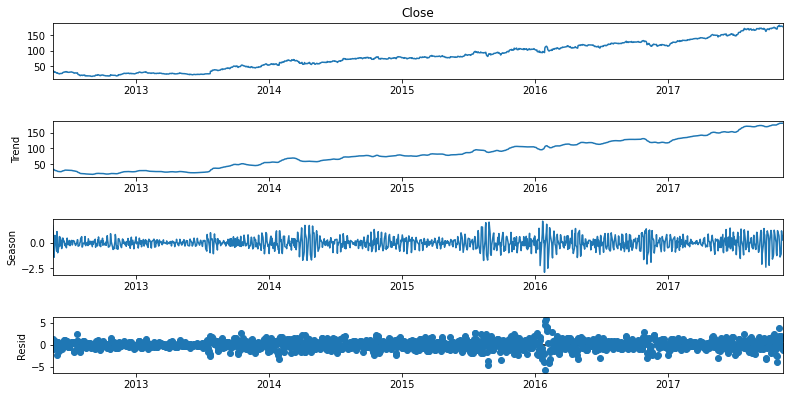

In [8]:
result = STL( df["Close"] , period=7).fit()
fig = result.plot()
fig.set_size_inches(12,6)

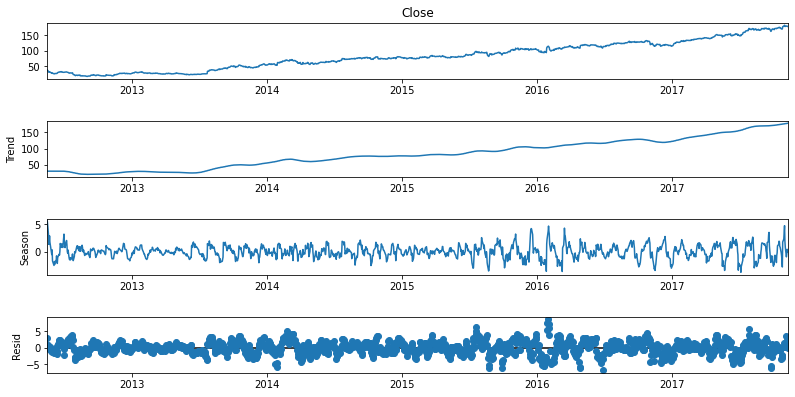

In [9]:
result = STL( df["Close"] , period=30).fit()
fig = result.plot()
fig.set_size_inches(12,6)

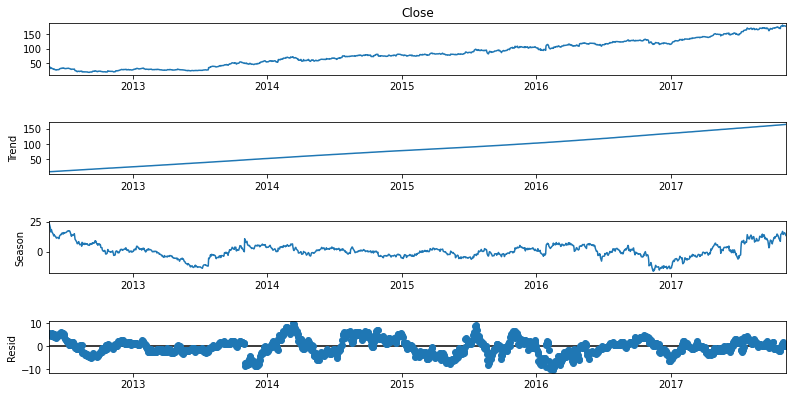

In [10]:
result = STL( df["Close"] , period=365).fit()
fig = result.plot()
fig.set_size_inches(12,6)

<AxesSubplot:>

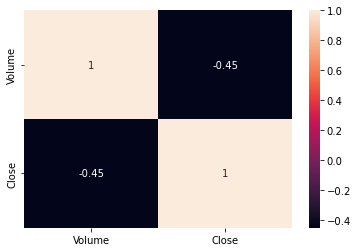

In [11]:
corrr = df[["Volume", "Close"]].corr()
sns.heatmap(corrr, annot=True)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppD

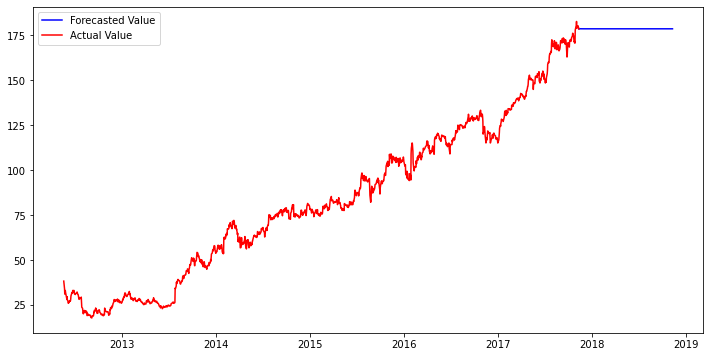

In [12]:
model = ARIMA( df["Close"] , order=(2,1,2))
results = model.fit()

forecast_steps = 365
forecast = results.forecast(forecast_steps)
forecast = forecast[1:]
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps, closed='right')

plt.figure(figsize=(12,6))
plt.plot(forecast_index, forecast, label="Forecasted Value", color="Blue")
plt.plot(df.index, df['Close'], label="Actual Value", color="Red")
plt.legend()
plt.show()